# I. Project Team Members

| Prepared by | Email | Prepared for |
| :-: | :-: | :-: |
| **Hardefa Rogonondo** | hardefarogonondo@gmail.com | **IMDb Sentiment Analysis Engine** |

# II. Notebook Target Definition

In this notebook, we perform exploratory data analysis and preprocessing for the IMDb Sentiment Analysis Engine Project. We begin by importing the dataset prepped in the data preparation stage, checking for and removing duplicate entries to ensure data uniqueness. Next, we cleanse any remaining HTML tags from the reviews for text purity. We then delve into data visualization, assessing sentiment distribution and pinpointing common words within reviews. Finally, we split the data into training and test sets, laying the groundwork for the subsequent deep learning modeling phase.

# III. Notebook Setup

## III.A. Import Libraries

In [1]:
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import re
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## III.B. Import Data

In [2]:
X = pd.read_pickle('../../data/processed/X.pkl')
y = pd.read_pickle('../../data/processed/y.pkl')

In [3]:
X.head()

,review
0,One of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...
2,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is..."


In [4]:
y.head()

0    positive
1    positive
2    positive
3    negative
4    positive
Name: sentiment, dtype: object

# IV. Exploratory Data Analysis and Preprocessing

## IV.A. Data Shape Inspection

In [5]:
X.shape, y.shape

((50000, 1), (50000,))

## IV.B. Data Information Inspection

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  50000 non-null  object
dtypes: object(1)
memory usage: 390.8+ KB


In [7]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 50000 entries, 0 to 49999
Series name: sentiment
Non-Null Count  Dtype 
--------------  ----- 
50000 non-null  object
dtypes: object(1)
memory usage: 390.8+ KB


## IV.C. Duplicated Values Inspection

In [8]:
X_duplicated = X[X.duplicated(keep='first')]
X_duplicated.shape

(418, 1)

In [9]:
X_duplicated.head()

,review
3537,Quite what the producers of this appalling ada...
3769,My favourite police series of all time turns t...
4391,"Beautiful film, pure Cassavetes style. Gena Ro..."
6352,If you liked the Grinch movie... go watch that...
6479,I want very much to believe that the above quo...


### IV.C.1. Duplicated Values Handling

In [10]:
def remove_duplicates(X, y):
    duplicated_rows = X.duplicated(keep='first')
    X_clean = X[~duplicated_rows]
    y_clean = y[~duplicated_rows]
    return X_clean, y_clean

In [11]:
X, y = remove_duplicates(X, y)
X.shape, y.shape

((49582, 1), (49582,))

In [12]:
X.head()

,review
0,One of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...
2,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is..."


In [13]:
y.head()

0    positive
1    positive
2    positive
3    negative
4    positive
Name: sentiment, dtype: object

## IV.D. Data Cleaning

In [14]:
def clean_html_tags(text):
    clean_text = re.sub(r'<.*?>', '', text)
    return clean_text

In [15]:
X["review"] = X["review"].apply(clean_html_tags)
X.shape

(49582, 1)

In [16]:
X.head()

,review
0,One of the other reviewers has mentioned that ...
1,A wonderful little production. The filming tec...
2,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is..."


## IV.E. Data Visualization

### IV.E.1. Target Label Proportion

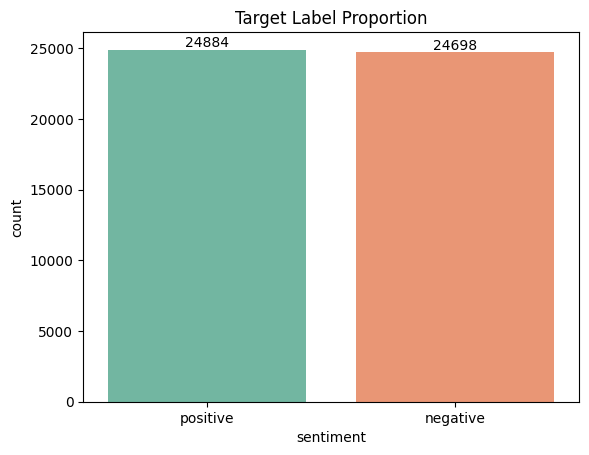

In [17]:
# Barplot
plt.title("Target Label Proportion")
y_proportion = sns.countplot(x=y, hue=y, palette='Set2', legend=False)
for container in y_proportion.containers:
    y_proportion.bar_label(container)
plt.show()

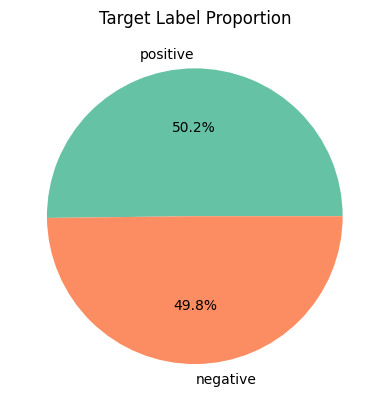

In [18]:
# Pie Chart
plt.title("Target Label Proportion")
plt.pie(x=y.value_counts(),
        labels=y.unique(),
        colors=sns.color_palette('Set2'),
        autopct='%1.1f%%')
plt.show()

### IV.E.2. Most Common Words in Reviews

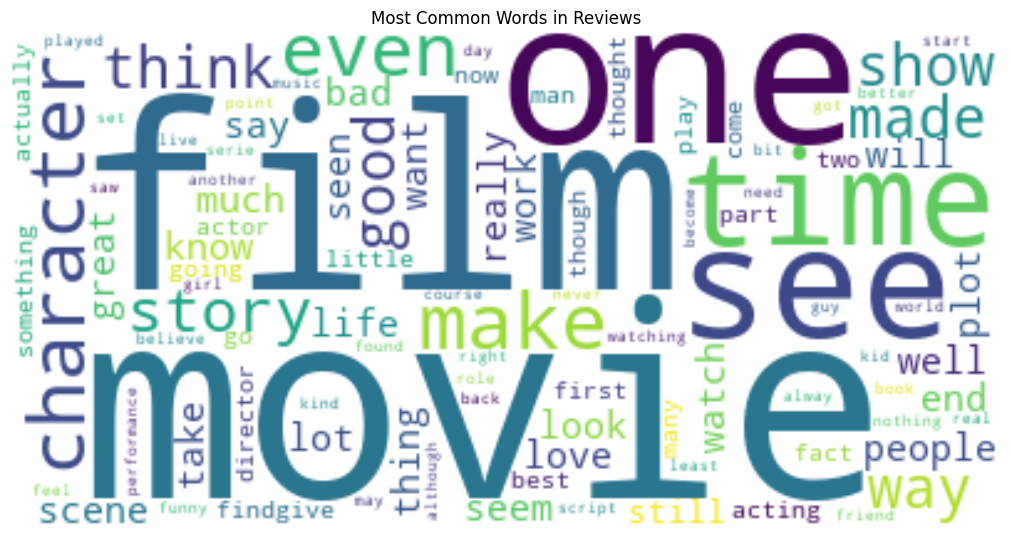

In [19]:
text = ' '.join(X["review"].dropna().tolist())
wordcloud = WordCloud(background_color='white', max_words=100).generate(text)
plt.figure(figsize=(12.8, 9.6))
plt.title("Most Common Words in Reviews")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### IV.E.3. Most Common Words in Positive Reviews

In [20]:
def display_sentiment_word_cloud(reviews, sentiments, sentiment_type):
    selected_reviews = " ".join(review for review, sentiment in zip(reviews, sentiments) if sentiment == sentiment_type)
    wordcloud = WordCloud(background_color='white', max_words=100).generate(text)
    plt.figure(figsize=(12.8, 9.6))
    plt.title(f"Most Common Words in {sentiment_type.capitalize()} Reviews")
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

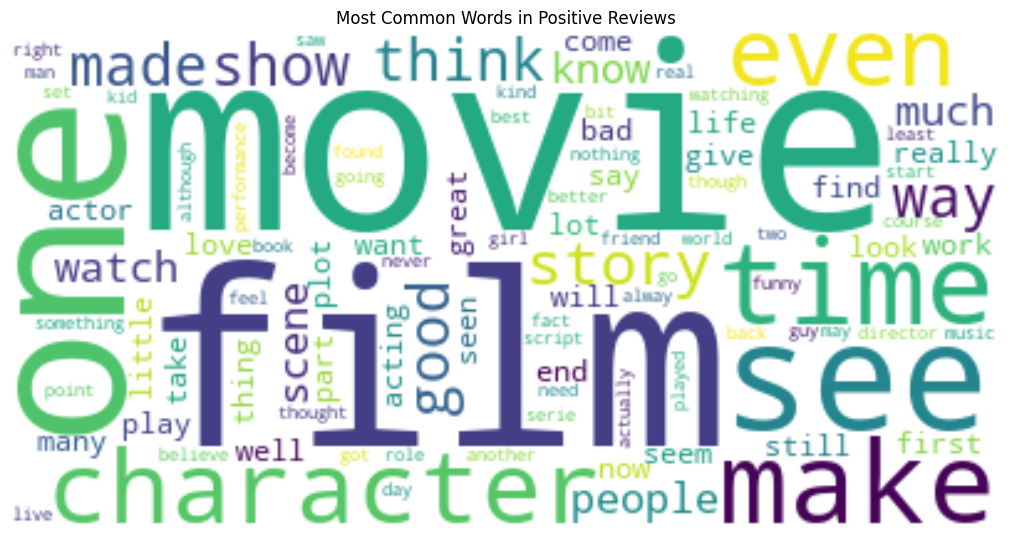

In [21]:
display_sentiment_word_cloud(X["review"], y, "positive")

### IV.E.4. Most Common Words in Negative Reviews

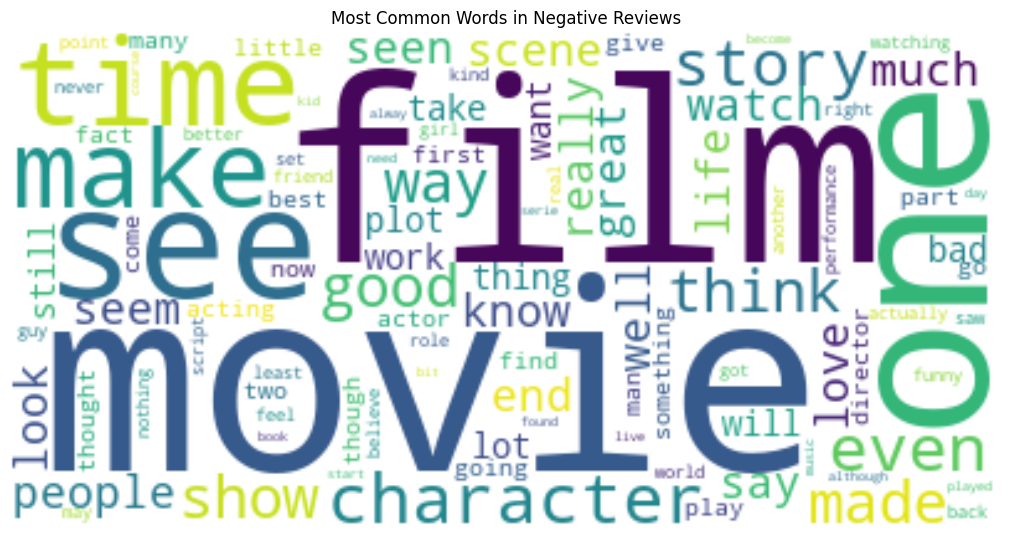

In [22]:
display_sentiment_word_cloud(X["review"], y, "negative")

### IV.E.5. Tokens Analysis

In [23]:
def tokens_analysis(df, column_name):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(df[column_name])
    lengths = [len(review.split()) for review in df[column_name]]
    vocab_size = len(tokenizer.word_index)
    total_reviews = len(lengths)
    average_length = sum(lengths)/len(lengths)
    max_length = max(lengths)
    print(f"Total reviews: {total_reviews}")
    print(f"Vocabulary size: {vocab_size}")
    print(f"Average review length: {average_length:.2f} words")
    print(f"Max review length: {max_length} words")
    analysis_results = {
        "total_reviews": total_reviews,
        "vocab_size": vocab_size,
        "average_length": average_length,
        "max_length": max_length,
        "lengths": lengths
    }
    return analysis_results


def plot_review_length_distribution(lengths, num_bins=30):
    plt.hist(lengths, bins=num_bins, color='skyblue')
    plt.title("Review Lengths Distribution")
    plt.xlabel("Review Length (Number of Words)")
    plt.ylabel("Number of Reviews")
    plt.show()

In [24]:
analysis_results = tokens_analysis(X, 'review')

Total reviews: 49582
Vocabulary size: 126505
Average review length: 227.30 words
Max review length: 2450 words


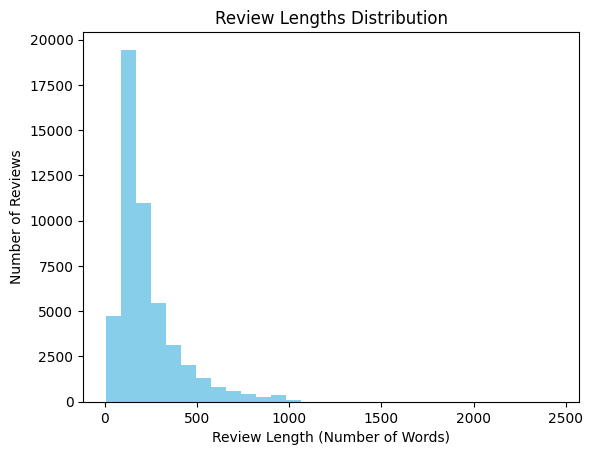

In [25]:
plot_review_length_distribution(analysis_results['lengths'])

## IV.F. Target Label Preprocessing

In [26]:
y = y.map({"positive": 1, "negative": 0})
y.shape

(49582,)

In [27]:
y.head()

0    1
1    1
2    1
3    0
4    1
Name: sentiment, dtype: int64

## IV.G. Data Splitting

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state = 777, stratify=y)

In [29]:
X_train.shape, X_test.shape

((39665, 1), (9917, 1))

In [30]:
y_train.shape, y_test.shape

((39665,), (9917,))

In [31]:
y_train.value_counts()

sentiment
1    19907
0    19758
Name: count, dtype: int64

In [32]:
y_test.value_counts()

sentiment
1    4977
0    4940
Name: count, dtype: int64

## IV.H. Export Data

In [33]:
X_train.to_pickle('../../data/processed/X_train.pkl')
X_test.to_pickle('../../data/processed/X_test.pkl')
y_train.to_pickle('../../data/processed/y_train.pkl')
y_test.to_pickle('../../data/processed/y_test.pkl')